### Importing libraries

In [1]:
import sys
sys.path.append("../")
import astrojigs
from astrojigs import *
import matplotlib.pyplot as plt
import numpy as np

c:\users\astro\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\astro\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
c:\users\astro\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Example 1: Plotting Center of Mass of points

In this example we will plot the center of mass of points which are added in the quadtree. We shall use a simplistic example of 5 `Point` (from `astrojigs.py`) objects being inserted into the quadtree and then we plot their center of mass. 

boundary = `Rectangle class(center_x,center_y, total_width, total_height)`

In [2]:
b1 = astrojigs.Rectangle(30,30,60,60)

In [3]:
quadtree = astrojigs.Quadtree(boundary=b1,G=1,theta_=1)

In [4]:
p1 = Point(x=10,y=50, mass=10)
p2 = Point(x=49,y=49, mass=11)
p3 = Point(x=1,y=1, mass=12)
p4 = Point(x=3,y=3, mass=13)
p5 = Point(x=50,y=10, mass=14)

points = [p1,p2,p3,p4,p5]

In [5]:
# Inserting the points:
for p in points:
    quadtree.insert(p)

We can see the quadtree after the points have been inserted.

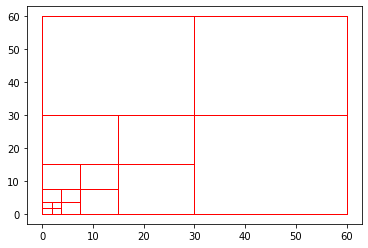

In [6]:
quadtree.show(show_entire=True)

This however is confusing to look at. By plotting the points we can see what the tree is actually doing.

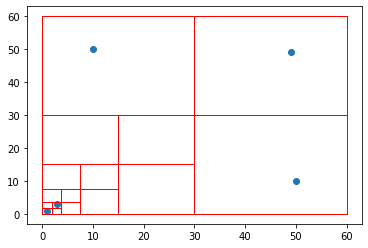

In [7]:
plt.scatter([p.x for p in points],[p.y for p in points])
quadtree.show(show_entire=True)

We can also see the quadtree by removing the rectangles which don't contain points.

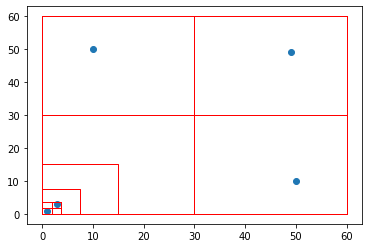

In [8]:
plt.scatter([p.x for p in points],[p.y for p in points])
quadtree.show(show_entire=False)

**Plotting Center of Mass**

Center of mass of the entire quadtree:

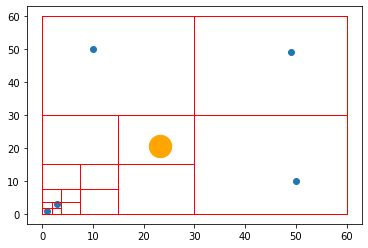

In [9]:
plt.scatter([p.x for p in points],[p.y for p in points])
x_com,y_com = quadtree.center_of_mass()
plt.scatter(x_com,y_com,s=500,c='orange')
quadtree.show(show_entire=True)

# Example 2: Accessing Sub-Qudrants

We can also access each of the quadrants from the quadtree.

Each quadrant is divided into 4 equal parts if the number of points exceed capacity. Here's how to access quadrants. 

`quadtree.quads = [northwest, northeast, southwest, southeast]`

* Accessing the point in the lower right part of the plot i.e. the southeast quadrant of the main quadtree.

Use the following:

In [10]:
quadtree.quads[3].points[0].x,quadtree.quads[3].points[0].y

(50, 10)

These are the coordinates of that point.

We can also find the mass of the point:

In [11]:
quadtree.quads[3].points[0].mass

14

We can access the center of mass each quadrant as well. We use the following lines of code to do it.

In [12]:
quadtree.quads[3].center_of_mass()

(50.0, 10.0)

Notice that the coordinates of center of mass of southeast quadrant is the same as the point's coordinates since only one point exists. Additionally, we can find the mass of COM.

In [13]:
quadtree.quads[3].mass

14.0

This gives you the mass of the COM (same as that of point since only one point exists)


Let's check COM for southwest quadrant where two points exist.

In [14]:
quadtree.quads[2].center_of_mass()

(2.04, 2.04)

Mass of this quadrant:

In [15]:
quadtree.quads[2].mass

25

We can plot sub-quadrants as well.

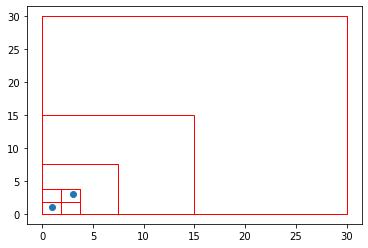

In [16]:
plt.scatter([p3.x,p4.x],[p3.y,p4.y])
quadtree.quads[2].show()

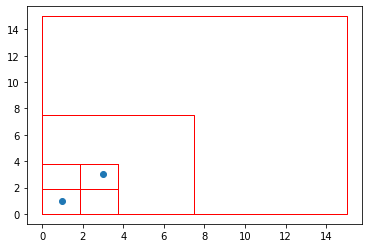

In [17]:
plt.scatter([p3.x,p4.x],[p3.y,p4.y])
quadtree.quads[2].quads[2].show()

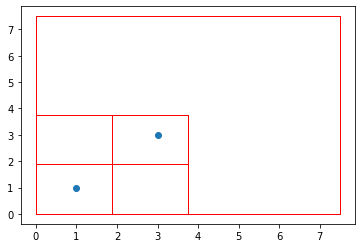

In [18]:
plt.scatter([p3.x,p4.x],[p3.y,p4.y])
quadtree.quads[2].quads[2].quads[2].show()

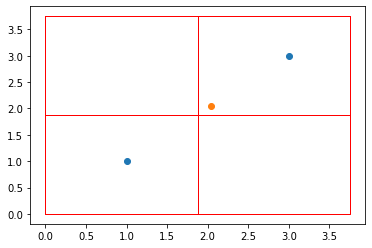

In [19]:
plt.scatter([p3.x,p4.x],[p3.y,p4.y])
quadtree.quads[2].quads[2].quads[2].quads[2].show()

# plotting the center of mass:
com_x,com_y = quadtree.quads[2].center_of_mass()
plt.scatter(com_x,com_y)

⚠️**Note** the above method only works because the parent quadrant has two points:

If more points were present, we would have used the following:

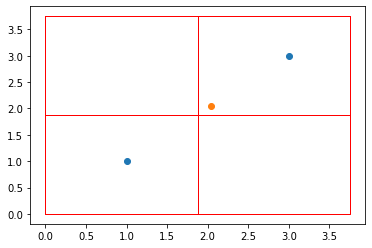

In [20]:
plt.scatter([p3.x,p4.x],[p3.y,p4.y])
quadtree.quads[2].quads[2].quads[2].quads[2].show()
com_x,com_y = quadtree.quads[2].quads[2].quads[2].quads[2].center_of_mass()
plt.scatter(com_x,com_y)

It's one and the same thing

# Example 3: increase the capacity to hold points

The default capacity is set to 1. However, you can choose your own capacity.

For example: Setting the capacity to two will tell the quadtree to sub-divide only when there are more than two points in the quadrant.

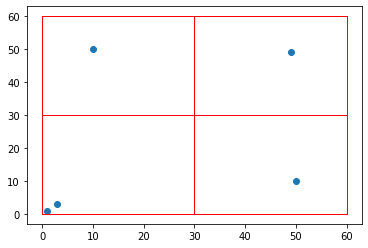

In [21]:
# making another quadtree
qt2 = astrojigs.Quadtree(boundary=b1, G=1, theta_=1, n=3)

# inserting points
for p in points:
    qt2.insert(p)
    
# plotting the quadtree with points
plt.scatter([p.x for p in points], [p.y for p in points])
qt2.show()

Accessing the center of mass and accessing sub-quadrants will be the same.

In [32]:
qt2.quads[2].points

[<astrojigs.Point at 0x24020127e80>, <astrojigs.Point at 0x24020127e20>]

Lets do this for 100 points:

In [57]:
qt_100 = astrojigs.Quadtree(boundary=b1,G=1,theta_=1,n=3)

points = [astrojigs.Point(x=np.random.uniform(0,60),
                         y = np.random.uniform(0,60),
                         mass=np.random.uniform(1,17)) for i in range(100)]

# Inserting points
for p in points:
    qt_100.insert(p)

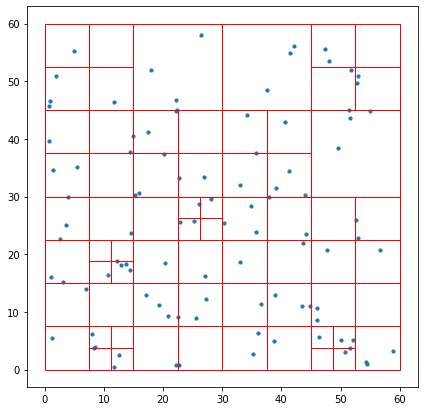

In [63]:
plt.figure(figsize=(7,7))
plt.scatter([p.x for p in points], [p.y for p in points],s=10)
qt_100.show(show_entire=False)

Now each quadrant has either 3 or less point objects.

# Example 4: Show Quadtree w.r.t a point.
I'm going to plot multiple points for this example.

In [ ]:
qt_150 = astrojigs.Quadtree(boundary=b1)